## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Goals of the Case Study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#### The steps are broadly:

1. Read and understand the data
2. Clean the data
3. Prepare the data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

In [1]:
# import and ignore the warings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the necessary librarires
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time, warnings
import datetime as dt

### Read the Data

In [3]:
# Read the leads data
leads = pd.read_csv("Leads.csv")

In [4]:
# Display the data
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# info of the lead data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Shape of the data
leads.shape

(9240, 37)

In [7]:
# Columns of the data
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Summary of the data
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Data Cleaning and Preparation

In [9]:
# Check the missing values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Missing values in percentage
leads.isnull().sum() * 100 / len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Remove all the columns which have above 30% missing values
leads.drop(["Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index",
           "Asymmetrique Activity Index","Lead Quality","Tags"], axis=1, inplace = True)

In [12]:
# Check the missing values
leads.isnull().sum() * 100 / len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
leads.drop(["Prospect ID","Lead Number"], axis=1,inplace=True)

In [14]:
leads = leads.replace("Select", np.nan)

In [15]:
leads.isnull().sum() * 100 / len(leads)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [16]:
leads.drop(["City","Lead Profile","How did you hear about X Education","Specialization"],axis=1,inplace=True)

In [17]:
leads.isnull().sum() * 100 / len(leads)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [18]:
for column in leads:
    print(leads[column].astype("category").value_counts())
    print("_____________________________________________")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
_____________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
_____________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
_____________________________________________
No     9238
Yes       2
Name: Do No

In [19]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [20]:
leads.isnull().sum() * 100 / len(leads)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [21]:
leads.drop(["Country"],axis=1,inplace=True)

In [22]:
leads.isnull().sum() * 100 / len(leads)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [23]:
leads = leads[~pd.isnull(leads["Lead Source"])]

In [24]:
leads.isnull().sum() * 100 / len(leads)

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.412429
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.412429
Last Activity                                     1.097349
What is your current occupation                  29.226423
What matters most to you in choosing a course    29.432855
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [25]:
leads = leads[~pd.isnull(leads["TotalVisits"])]

In [26]:
leads = leads[~pd.isnull(leads["Page Views Per Visit"])]

In [27]:
leads = leads[~pd.isnull(leads["Last Activity"])]

In [28]:
leads = leads[~pd.isnull(leads["What is your current occupation"])]

In [29]:
leads = leads[~pd.isnull(leads["What matters most to you in choosing a course"])]

In [30]:
leads.isnull().sum() * 100 / len(leads)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

In [31]:
print(len(leads.index))
print(len(leads.index)/9240)

6372
0.6896103896103896


We have 69% of the rows which seems good enough 

In [32]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3              Unreachable                      Unemployed   
4        Converted to Lead                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

### Data Visualisation and data preparation for model building.

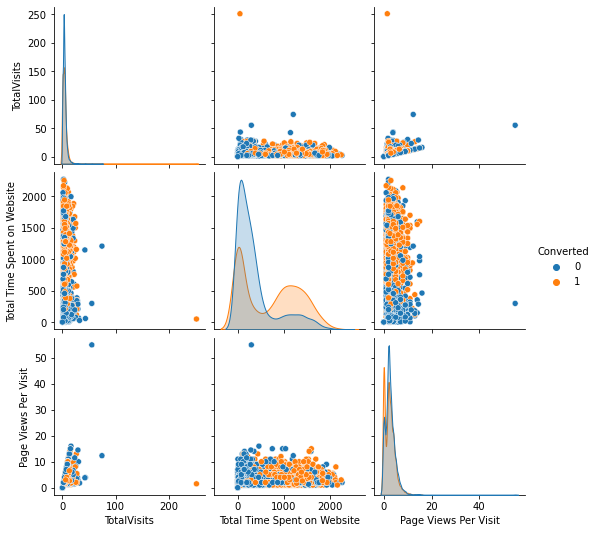

In [33]:
sns.pairplot(leads, diag_kind="kde", hue="Converted")
plt.show()

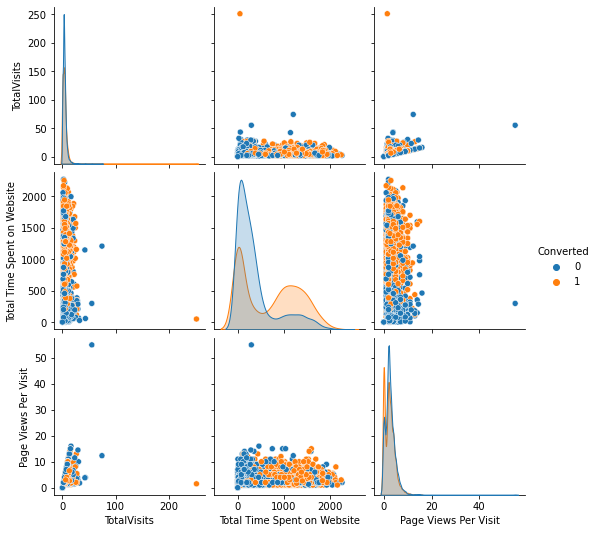

In [34]:
edu = leads[["TotalVisits","Total Time Spent on Website","Page Views Per Visit","Converted"]]
sns.pairplot(edu,diag_kind = "kde", hue="Converted")
plt.show()

In [35]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformededu = pd.DataFrame(pt.fit_transform(edu))
transformededu.columns = edu.columns
transformededu.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0    -1.537793                    -1.532421             -1.534678  -0.962716
1     0.691551                     0.641809              0.231122  -0.962716
2    -0.222840                     1.262382             -0.018771   1.038728
3    -0.726569                     0.153643             -0.629737  -0.962716
4    -0.222840                     1.204052             -0.629737   1.038728

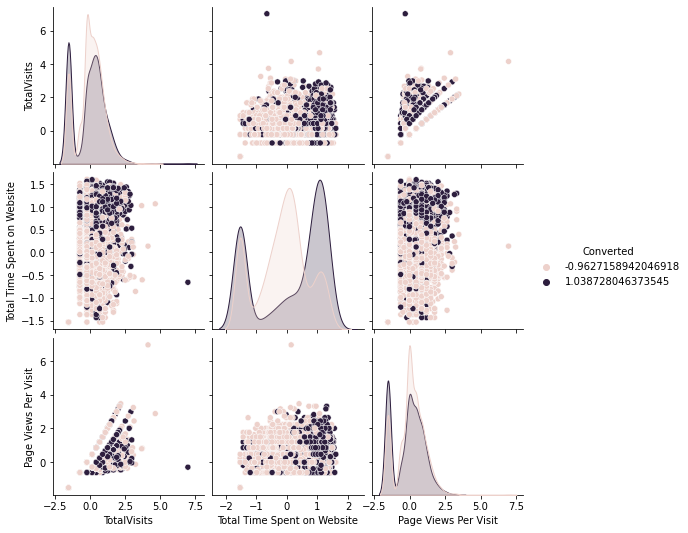

In [36]:
sns.pairplot(transformededu,diag_kind="kde",hue="Converted")
plt.show()

### Dummy Variable Creation

In [37]:
A = leads.loc[:, leads.dtypes=="object"]
A.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

leads = pd.concat([leads,dummy],axis=1)

In [39]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3              Unreachable                      Unemployed   
4        Converted to Lead                      Unemployed   

  What matters most to you in choosing a course  ...  \
0                       Better Career Prospects  ...   
1                       Better Career Prospects  ...   
2                       Better Career Prospects  ...   
3                       Better Career Prospects  ...   
4                       Better Career Prospects  ...   

  Last Notable Activity_Email Opened Last Notable Activity_Email Received  \
0                                  0                                    0   
1                                  1                                    0   
2                                  1                                    0   
3                                  0                                    0   
4                                  0                                    0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                             

In [40]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Acti

In [41]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [42]:
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Email Opened  \
0                   0  ...                                   0   
1                   0  ...                                   1   
2                   0  ...                                   1   
3                   0  ...                                   0   
4                   1  ...                                   0   

   Last Notable Activity_Email Received  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1         

### Train-Test-Split

In [43]:
# import the required library

from sklearn.model_selection import train_test_split

In [44]:
# Create X variable
X = leads.drop(["Converted"], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Last Notable Activity_Email Opened  Last Notable Activity_Email Received  \
0                                   0                                     0   
1                                   1                                     0   
2                                   1                                     0   
3                                   0                                     0   
4                                   0                                     0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clic

In [45]:
# Create Y variable
y = leads["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Split the data into 70% train train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Scaling

In [47]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [48]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]] = scaler.fit_transform(X_train[["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4170     0.015936                     0.408891                0.2500   
6812     0.063745                     0.539613                0.1250   
7717     0.000000                     0.000000                0.0000   
207      0.019920                     0.157570                0.3125   
2044     0.007968                     0.163292                0.1250   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4170                                    1                          0   
6812                                    1                          0   
7717                                    0                          0   
207                                     0                          0   
2044                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4170                        0                           1   
6812                        0                           1   
7717                        0                           0   
207                         0                           0   
2044                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
4170                     0                   0                      0  ...   
6812                     0                   0                      0  ...   
7717                     0                   0                      0  ...   
207                      0                   0                      0  ...   
2044                     0                   1                      0  ...   

      Last Notable Activity_Email Opened  \
4170                                   0   
6812                                   1   
7717                                   1   
207                                    0   
2044                                   0   

      Last Notable Activity_Email Received  \
4170                                     0   
6812                                     0   
7717                                     0   
207                                      0   
2044                                     0   

      Last Notable Activity_Had a Phone Conversation  \
4170                                               0   
6812                                               0   
7717                                               0   
207                                                0   
2044                                               0   

      Last Notable Activity_Modified  \
4170                               0   
6812                               0   
7717                               0   
207                                1   
2044                               1   

      Last Notable Activity_Olark Chat Conversation  \
4170                                              0   
6812                                              0   
7717                                              0   
207                                               0   
2044                                              0   

      Last Notable Activity_Page Visited on Website  \
4170                                              0   
6812                                              0   
7717                                              0   
207                                               0   
2044                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
4170                               1                                  0   
6812                               0                                  0   
7717                               0                                  0   
207                                0                                  0   
2044                               0                                  0   

      Last Notable Activity_Unsubscribed  \
4170                       

### Looking at the Correlations

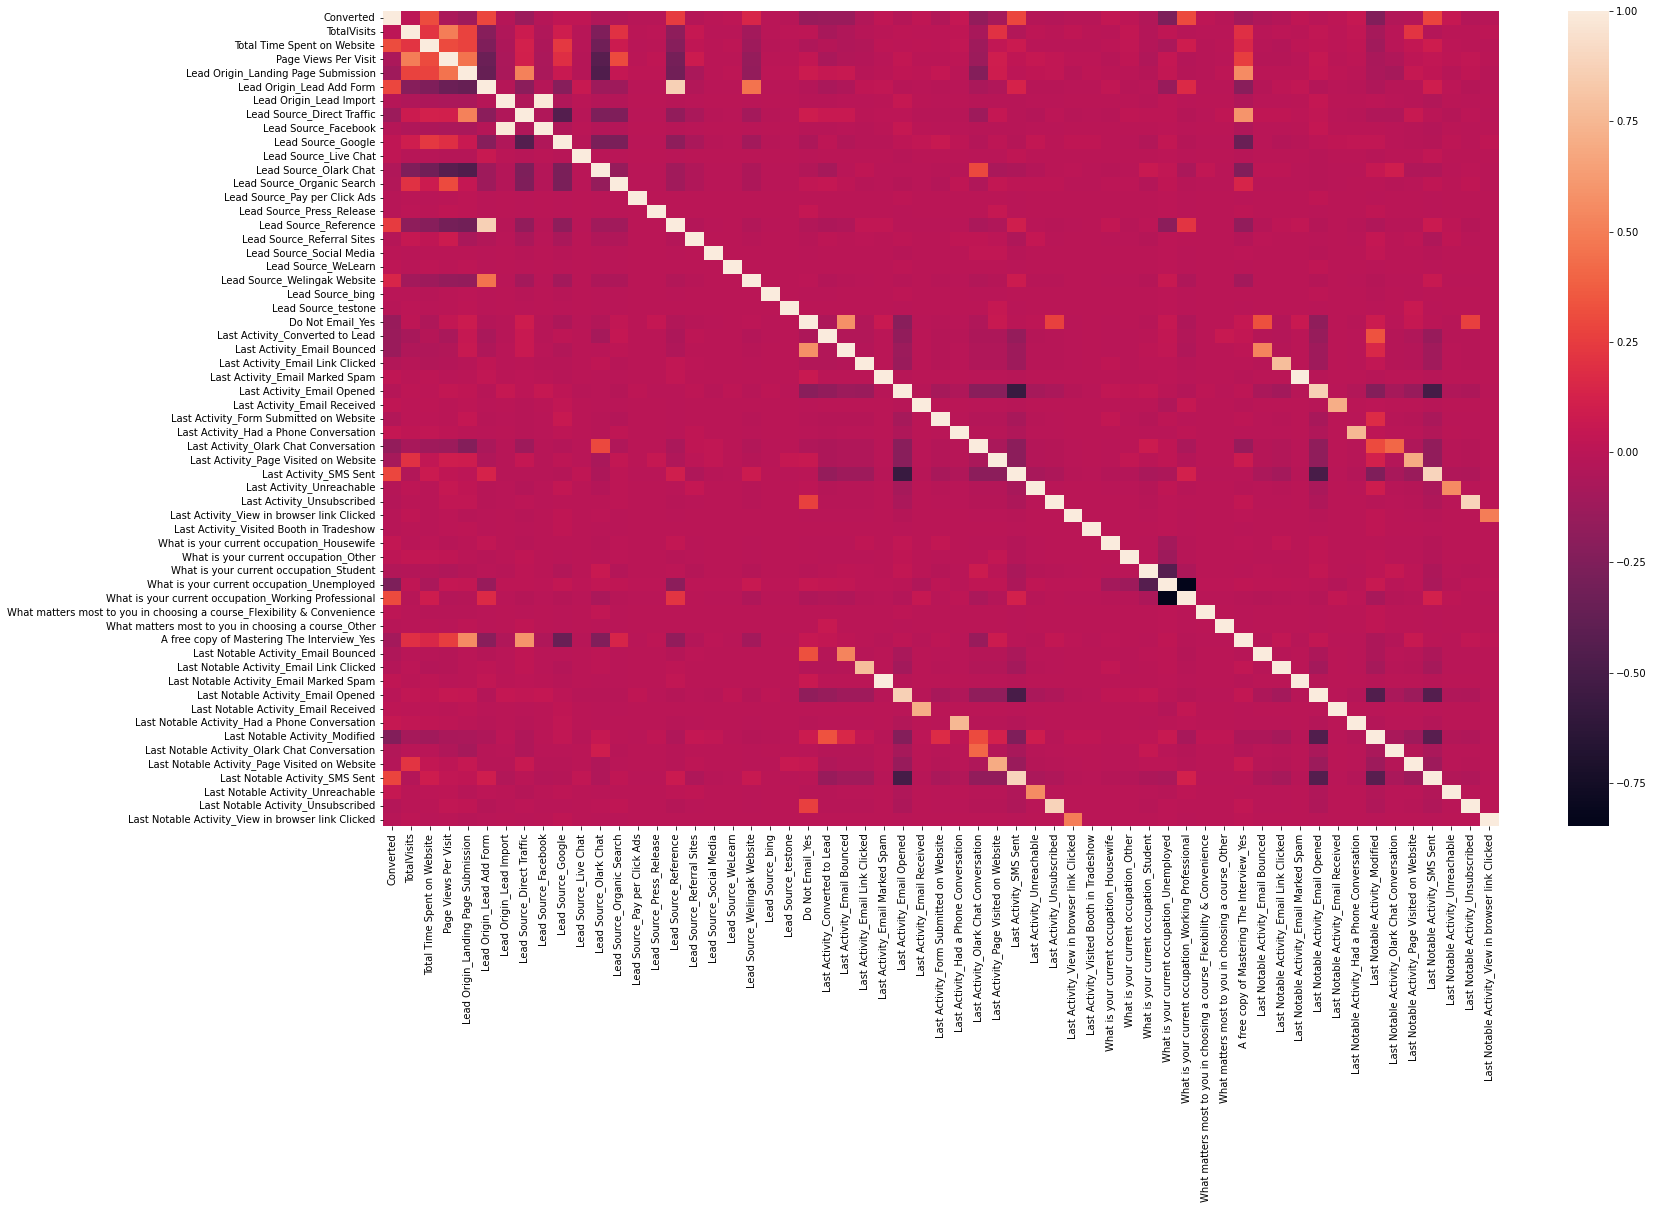

In [49]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

### Model Building

In [50]:
# Import "LogisticRegression" and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
# Import RFE and select 15 variable
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 40),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_testone', False, 22),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Cli

In [53]:
col = X_train.columns[rfe.support_]

In [54]:
X_train = X_train[col]

In [55]:
# Import statsmodels
import statsmodels.api as sm

In [56]:
# Fit a logistic Regression model 
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.7
Date:                Mon, 08 Aug 2022   Deviance:                       4093.4
Time:                        16:06:35   Pearson chi2:                 4.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1954      0.616     -0.317      0.751      -1.403       1.012
TotalVisits                                              9.1848      2.962      3.101      0.002       3.379      14.991
Total Time Spent on Website                              4.4947      0.189     23.834      0.000       4.125       4.864
Lead Origin_Lead Add Form                                1.9738      0.987      2.000      0.045       0.040       3.908
Lead Source_Olark Chat                                   1.5170      0.125     12.135      0.000       1.272       1.762
Lead Source_Reference                                    2.0379      1.011      2.016      0.044       0.056       4.019
Lead Source_Welingak Website                             4.2664      1.409      3.028      0.002       1.505       7.028
Do Not Email_Yes                                        -1.3402      0.190     -7.053      0.000      -1.713      -0.968
Last Activity_Had a Phone Conversation                   1.5489      1.006      1.539      0.124      -0.424       3.521
Last Activity_SMS Sent                                   1.0057      0.084     11.966      0.000       0.841       1.170
What is your current occupation_Student                 -1.8946      0.646     -2.932      0.003      -3.161      -0.628
What is your current occupation_Unemployed              -1.8426      0.609     -3.025      0.002      -3.037      -0.649
What is your current occupation_Working Professional     0.6445      0.637      1.012      0.312      -0.604       1.893
Last Notable Activity_Had a Phone Conversation          21.3626   1.21e+04      0.002      0.999   -2.36e+04    2.36e+04
Last Notable Activity_Modified                          -0.8393      0.090     -9.309      0.000      -1.016      -0.663
Last Notable Activity_Unreachable                        2.5422      0.802      3.171      0.002       0.971       4.114
========================================================================================================================
"""

In [57]:
# Import "variance_inflation_factor"
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
vif["Featrues"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Featrues    VIF
2                           Lead Origin_Lead Add Form  69.36
4                               Lead Source_Reference  53.91
5                        Lead Source_Welingak Website  16.55
10         What is your current occupation_Unemployed   4.66
7              Last Activity_Had a Phone Conversation   2.85
12     Last Notable Activity_Had a Phone Conversation   2.85
1                         Total Time Spent on Website   2.42
8                              Last Activity_SMS Sent   1.69
0                                         TotalVisits   1.68
11  What is your current occupation_Working Profes...   1.65
13                     Last Notable Activity_Modified   1.57
3                              Lead Source_Olark Chat   1.45
9             What is your current occupation_Student   1.12
6                                    Do Not Email_Yes   1.09
14                  Last Notable Activity_Unreachable   1.01

In [59]:
X_train.drop("Lead Source_Reference",axis=1,inplace=True)

In [60]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.4
Date:                Mon, 08 Aug 2022   Deviance:                       4096.8
Time:                        16:06:36   Pearson chi2:                 4.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1920      0.616     -0.312      0.755      -1.399       1.015
TotalVisits                                              9.1632      2.962      3.094      0.002       3.359      14.968
Total Time Spent on Website                              4.4927      0.189     23.820      0.000       4.123       4.862
Lead Origin_Lead Add Form                                3.9337      0.240     16.391      0.000       3.463       4.404
Lead Source_Olark Chat                                   1.5142      0.125     12.104      0.000       1.269       1.759
Lead Source_Welingak Website                             2.3051      1.032      2.233      0.026       0.282       4.329
Do Not Email_Yes                                        -1.3369      0.190     -7.046      0.000      -1.709      -0.965
Last Activity_Had a Phone Conversation                   1.5484      1.006      1.539      0.124      -0.424       3.521
Last Activity_SMS Sent                                   1.0058      0.084     11.973      0.000       0.841       1.170
What is your current occupation_Student                 -1.8926      0.646     -2.931      0.003      -3.158      -0.627
What is your current occupation_Unemployed              -1.8453      0.609     -3.031      0.002      -3.038      -0.652
What is your current occupation_Working Professional     0.6445      0.636      1.013      0.311      -0.603       1.892
Last Notable Activity_Had a Phone Conversation          21.3639   1.21e+04      0.002      0.999   -2.36e+04    2.36e+04
Last Notable Activity_Modified                          -0.8384      0.090     -9.308      0.000      -1.015      -0.662
Last Notable Activity_Unreachable                        2.5428      0.802      3.172      0.002       0.972       4.114
========================================================================================================================
"""

In [61]:
vif = pd.DataFrame()
vif["Featrues"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Featrues   VIF
9          What is your current occupation_Unemployed  4.66
6              Last Activity_Had a Phone Conversation  2.85
11     Last Notable Activity_Had a Phone Conversation  2.85
1                         Total Time Spent on Website  2.41
2                           Lead Origin_Lead Add Form  1.71
7                              Last Activity_SMS Sent  1.69
0                                         TotalVisits  1.68
10  What is your current occupation_Working Profes...  1.65
12                     Last Notable Activity_Modified  1.57
3                              Lead Source_Olark Chat  1.45
4                        Lead Source_Welingak Website  1.32
8             What is your current occupation_Student  1.12
5                                    Do Not Email_Yes  1.09
13                  Last Notable Activity_Unreachable  1.01

In [62]:
X_train.drop("Last Notable Activity_Had a Phone Conversation",axis=1,inplace=True)

In [63]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.4
Date:                Mon, 08 Aug 2022   Deviance:                       4100.7
Time:                        16:06:36   Pearson chi2:                 4.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1893      0.616     -0.307      0.758      -1.396       1.017
TotalVisits                                              9.2372      2.959      3.121      0.002       3.437      15.038
Total Time Spent on Website                              4.4876      0.189     23.801      0.000       4.118       4.857
Lead Origin_Lead Add Form                                3.9346      0.240     16.392      0.000       3.464       4.405
Lead Source_Olark Chat                                   1.5143      0.125     12.104      0.000       1.269       1.760
Lead Source_Welingak Website                             2.3044      1.032      2.232      0.026       0.281       4.328
Do Not Email_Yes                                        -1.3371      0.190     -7.046      0.000      -1.709      -0.965
Last Activity_Had a Phone Conversation                   2.8205      0.802      3.515      0.000       1.248       4.393
Last Activity_SMS Sent                                   1.0043      0.084     11.957      0.000       0.840       1.169
What is your current occupation_Student                 -1.8928      0.646     -2.931      0.003      -3.158      -0.627
What is your current occupation_Unemployed              -1.8451      0.609     -3.031      0.002      -3.038      -0.652
What is your current occupation_Working Professional     0.6446      0.636      1.013      0.311      -0.603       1.892
Last Notable Activity_Modified                          -0.8468      0.090     -9.408      0.000      -1.023      -0.670
Last Notable Activity_Unreachable                        2.5395      0.802      3.168      0.002       0.968       4.111
========================================================================================================================
"""

In [64]:
vif = pd.DataFrame()
vif["Featrues"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Featrues   VIF
9          What is your current occupation_Unemployed  4.66
1                         Total Time Spent on Website  2.41
2                           Lead Origin_Lead Add Form  1.71
7                              Last Activity_SMS Sent  1.69
0                                         TotalVisits  1.68
10  What is your current occupation_Working Profes...  1.65
11                     Last Notable Activity_Modified  1.56
3                              Lead Source_Olark Chat  1.45
4                        Lead Source_Welingak Website  1.32
8             What is your current occupation_Student  1.12
5                                    Do Not Email_Yes  1.09
6              Last Activity_Had a Phone Conversation  1.01
12                  Last Notable Activity_Unreachable  1.01

In [65]:
X_train.drop("What is your current occupation_Working Professional",axis=1,inplace=True)

In [66]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.8
Date:                Mon, 08 Aug 2022   Deviance:                       4101.7
Time:                        16:06:37   Pearson chi2:                 4.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4068      0.202      2.017      0.044       0.011       0.802
TotalVisits                                    9.1079      2.956      3.081      0.002       3.315      14.901
Total Time Spent on Website                    4.4869      0.189     23.797      0.000       4.117       4.856
Lead Origin_Lead Add Form                      3.9328      0.240     16.388      0.000       3.462       4.403
Lead Source_Olark Chat                         1.5128      0.125     12.098      0.000       1.268       1.758
Lead Source_Welingak Website                   2.3033      1.032      2.231      0.026       0.280       4.327
Do Not Email_Yes                              -1.3368      0.190     -7.043      0.000      -1.709      -0.965
Last Activity_Had a Phone Conversation         2.8232      0.802      3.519      0.000       1.251       4.396
Last Activity_SMS Sent                         1.0068      0.084     11.998      0.000       0.842       1.171
What is your current occupation_Student       -2.4870      0.285     -8.717      0.000      -3.046      -1.928
What is your current occupation_Unemployed    -2.4395      0.187    -13.077      0.000      -2.805      -2.074
Last Notable Activity_Modified                -0.8476      0.090     -9.418      0.000      -1.024      -0.671
Last Notable Activity_Unreachable              2.5409      0.801      3.170      0.002       0.970       4.112
==============================================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif["Featrues"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Featrues   VIF
9   What is your current occupation_Unemployed  3.42
1                  Total Time Spent on Website  2.03
0                                  TotalVisits  1.58
7                       Last Activity_SMS Sent  1.56
10              Last Notable Activity_Modified  1.49
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.34
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.09
8      What is your current occupation_Student  1.08
6       Last Activity_Had a Phone Conversation  1.01
11           Last Notable Activity_Unreachable  1.01

In [68]:
X_train.drop("Lead Source_Welingak Website",axis=1,inplace=True)

In [69]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.8
Date:                Mon, 08 Aug 2022   Deviance:                       4111.6
Time:                        16:06:38   Pearson chi2:                 4.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.3954      0.202      1.958      0.050      -0.000       0.791
TotalVisits                                    9.0997      2.957      3.078      0.002       3.305      14.895
Total Time Spent on Website                    4.4887      0.189     23.799      0.000       4.119       4.858
Lead Origin_Lead Add Form                      4.2471      0.231     18.383      0.000       3.794       4.700
Lead Source_Olark Chat                         1.5140      0.125     12.101      0.000       1.269       1.759
Do Not Email_Yes                              -1.3230      0.188     -7.032      0.000      -1.692      -0.954
Last Activity_Had a Phone Conversation         2.8263      0.802      3.523      0.000       1.254       4.399
Last Activity_SMS Sent                         1.0126      0.084     12.085      0.000       0.848       1.177
What is your current occupation_Student       -2.4894      0.287     -8.687      0.000      -3.051      -1.928
What is your current occupation_Unemployed    -2.4291      0.187    -12.995      0.000      -2.795      -2.063
Last Notable Activity_Modified                -0.8527      0.090     -9.475      0.000      -1.029      -0.676
Last Notable Activity_Unreachable              2.5398      0.802      3.168      0.002       0.968       4.111
==============================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif["Featrues"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Featrues   VIF
8   What is your current occupation_Unemployed  3.39
1                  Total Time Spent on Website  2.02
0                                  TotalVisits  1.58
6                       Last Activity_SMS Sent  1.56
9               Last Notable Activity_Modified  1.48
3                       Lead Source_Olark Chat  1.34
2                    Lead Origin_Lead Add Form  1.19
4                             Do Not Email_Yes  1.09
7      What is your current occupation_Student  1.08
5       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

### Model Evaluation

In [71]:
# Use "predict" to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4170    0.722995
6812    0.724843
7717    0.372939
207     0.119442
2044    0.110977
3330    0.782839
6498    0.042678
2085    0.901455
6260    0.192691
19      0.070182
dtype: float64

In [72]:
# Reshape into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72299453, 0.72484313, 0.37293857, 0.11944239, 0.1109771 ,
       0.78283932, 0.04267758, 0.90145496, 0.19269146, 0.07018162])

In [73]:
# Lets create a dataframe with actual conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({"Converted" :y_train.values, "Converted_Prob" :y_train_pred})
y_train_pred_final.head()

Converted  Converted_Prob
0          1        0.722995
1          1        0.724843
2          1        0.372939
3          0        0.119442
4          0        0.110977

In [74]:
# Create new column "Prediction" with 1 if paid_Prob > 0.5 else 0
y_train_pred_final["Prediction"] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prediction
0          1        0.722995           1
1          1        0.724843           1
2          1        0.372939           0
3          0        0.119442           0
4          0        0.110977           0

In [75]:
# import metrics for evaluation
from sklearn import metrics

In [76]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction)
print(confusion)

[[1938  381]
 [ 559 1582]]


In [77]:
# Lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction))

0.7892376681614349


In [78]:
# # metrics beyond simple accuracy

TP = confusion[1,1] # true  positive
TN = confusion[0,0] # true  negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [79]:
# Sensitivity
TP/(TP+FN)

0.7389070527790752

In [80]:
# Specificity
TN/(TN+FP)

0.8357050452781372

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [81]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


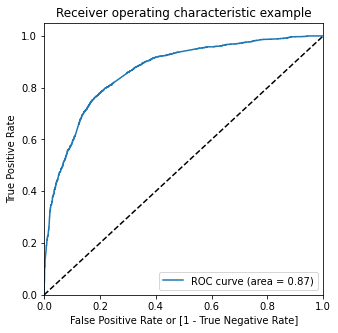

In [83]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [84]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prediction  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1        0.722995           1    1    1    1    1    1    1    1   
1          1        0.724843           1    1    1    1    1    1    1    1   
2          1        0.372939           0    1    1    1    1    0    0    0   
3          0        0.119442           0    1    1    0    0    0    0    0   
4          0        0.110977           0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    1    0    0  
1    1    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [85]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480045  1.000000  0.000000
0.1   0.1  0.575785  0.986922  0.196205
0.2   0.2  0.691928  0.950023  0.453644
0.3   0.3  0.764350  0.899580  0.639500
0.4   0.4  0.787668  0.802896  0.773609
0.5   0.5  0.789238  0.738907  0.835705
0.6   0.6  0.778027  0.676787  0.871496
0.7   0.7  0.743498  0.555815  0.916774
0.8   0.8  0.708296  0.444185  0.952135
0.9   0.9  0.654709  0.301261  0.981026


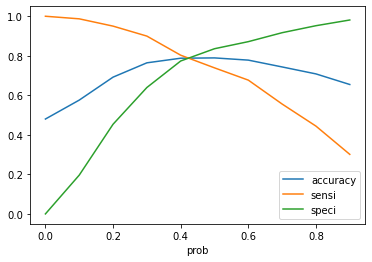

In [86]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.



In [87]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prediction  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1        0.722995           1    1    1    1    1    1    1    1   
1          1        0.724843           1    1    1    1    1    1    1    1   
2          1        0.372939           0    1    1    1    1    0    0    0   
3          0        0.119442           0    1    1    0    0    0    0    0   
4          0        0.110977           0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_prediction  
0    1    0    0                 1  
1    1    0    0                 1  
2    0    0    0                 0  
3    0    0    0                 0  
4    0    0    0                 0

In [88]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.7894618834080718

In [89]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
confusion2

array([[1834,  485],
       [ 454, 1687]], dtype=int64)

In [90]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
# Calculate Sensitivity

TP/(TP+FN)

0.7879495562821112

In [92]:
# Calculate Specificity

TN/(TN+FP)

0.7908581285036653

### Test Prediction

In [93]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [94]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
8402     0.007968                     0.621479                          0   
8782     0.019920                     0.246039                          0   
6199     0.011952                     0.414613                          0   
6482     0.000000                     0.000000                          0   
6026     0.000000                     0.000000                          1   

      Lead Source_Olark Chat  Lead Source_Reference  \
8402                       0                      0   
8782                       0                      0   
6199                       0                      0   
6482                       1                      0   
6026                       0                      1   

      Lead Source_Welingak Website  Do Not Email_Yes  \
8402                             0                 0   
8782                             0                 0   
6199                             0                 0   
6482                             0                 0   
6026                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
8402                                       0                       0   
8782                                       0                       0   
6199                                       0                       1   
6482                                       0                       0   
6026                                       0                       0   

      What is your current occupation_Student  \
8402                                        0   
8782                                        0   
6199                                        0   
6482                                        0   
6026                                        0   

      What is your current occupation_Unemployed  \
8402                                           1   
8782                                           1   
6199                                           1   
6482                                           1   
6026                                           1   

      What is your current occupation_Working Professional  \
8402                                                  0      
8782                                                  0      
6199                                                  0      
6482                                                  0      
6026                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
8402                                               0   
8782                                               0   
6199                                               0   
6482                                               0   
6026                                               0   

      Last Notable Activity_Modified  Last Notable Activity_Unreachable  
8402                               1                                  0  
8782                               1                                  0  
6199                               0                                  0  
6482                               0                                  0  
6026                               0                                  0

In [95]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [96]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
8402    1.0     0.007968                     0.621479   
8782    1.0     0.019920                     0.246039   
6199    1.0     0.011952                     0.414613   
6482    1.0     0.000000                     0.000000   
6026    1.0     0.000000                     0.000000   
...     ...          ...                          ...   
5528    1.0     0.019920                     0.064261   
3055    1.0     0.011952                     0.549296   
7220    1.0     0.015936                     0.706866   
5135    1.0     0.015936                     0.687940   
218     1.0     0.015936                     0.082306   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
8402                          0                       0   
8782                          0                       0   
6199                          0                       0   
6482                          0                       1   
6026                          1                       0   
...                         ...                     ...   
5528                          0                       0   
3055                          0                       0   
7220                          0                       0   
5135                          0                       0   
218                           0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
8402                      0                             0                 0   
8782                      0                             0                 0   
6199                      0                             0                 0   
6482                      0                             0                 0   
6026                      1                             0                 0   
...                     ...                           ...               ...   
5528                      0                             0                 0   
3055                      0                             0                 0   
7220                      0                             0                 0   
5135                      0                             0                 0   
218                       0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
8402                                       0                       0   
8782                                       0                       0   
6199                                       0                       1   
6482                                       0                       0   
6026                                       0                       0   
...                                      ...                     ...   
5528                                       0                       0   
3055                                       0                       1   
7220                                       0                       0   
5135                                       0                       1   
218                                        0                       0   

      What is your current occupation_Student  \
8402                                        0   
8782                                        0   
6199                                        0   
6482                                        0   
6026                                        0   
...                                       ...   
5528                                        0   
3055                                        0   
7220                                        0   
5135                                        0   
218                                         0   

      What is your current occupation_Unemployed  \
8402                                           1   
8782                                           1   
6199                                           1   
6

In [97]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Working Professional', "Lead Source_Welingak Website",
             'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [98]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [99]:
y_test_pred[:10]

8402    0.493968
8782    0.167896
6199    0.720873
6482    0.372939
6026    0.901455
5991    0.339987
3812    0.429046
6307    0.175076
7344    0.735341
4171    0.074837
dtype: float64

In [100]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
8402  0.493968
8782  0.167896
6199  0.720873
6482  0.372939
6026  0.901455

In [101]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [102]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [104]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.493968
1          0  0.167896
2          1  0.720873
3          1  0.372939
4          1  0.901455

In [105]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})

In [106]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Converted_Prob
0          1        0.493968
1          0        0.167896
2          1        0.720873
3          1        0.372939
4          1        0.901455

In [107]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [108]:
# Check y_pred_final

y_pred_final.head()

Converted  Converted_Prob  final_prediction
0          1        0.493968                 1
1          0        0.167896                 0
2          1        0.720873                 1
3          1        0.372939                 0
4          1        0.901455                 1

In [109]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_prediction)

0.7981171548117155

In [110]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_prediction)
confusion2

array([[788, 200],
       [186, 738]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Calculate sensitivity
TP / (TP+FN)

0.7987012987012987

In [113]:
# Calculate specificity
TN / (TN+FP)

0.7975708502024291

### Precision-Recall View

In [114]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction)
confusion

array([[1938,  381],
       [ 559, 1582]], dtype=int64)

In [115]:
# Precision
TP / (TP + FP)

0.7867803837953091

In [116]:
# Recall
TP / (TP + FN)

0.7987012987012987

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


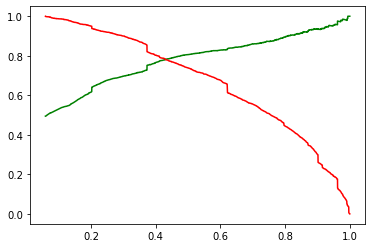

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [120]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prediction  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1        0.722995           1    1    1    1    1    1    1    1   
1          1        0.724843           1    1    1    1    1    1    1    1   
2          1        0.372939           0    1    1    1    1    0    0    0   
3          0        0.119442           0    1    1    0    0    0    0    0   
4          0        0.110977           0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_prediction  
0    1    0    0                 1  
1    1    0    0                 1  
2    0    0    0                 0  
3    0    0    0                 0  
4    0    0    0                 0

In [121]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.7901345291479821

In [122]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
confusion2

array([[1865,  454],
       [ 482, 1659]], dtype=int64)

In [123]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Calculate Precision

TP/(TP+FP)

0.7851396119261713

In [125]:
# Calculate Recall

TP/(TP+FN)

0.7748715553479683

### Making Predictions on the Test Set

In [126]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

8402    0.493968
8782    0.167896
6199    0.720873
6482    0.372939
6026    0.901455
5991    0.339987
3812    0.429046
6307    0.175076
7344    0.735341
4171    0.074837
dtype: float64

In [127]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
8402  0.493968
8782  0.167896
6199  0.720873
6482  0.372939
6026  0.901455

In [128]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [129]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted         0
0          1  0.493968
1          0  0.167896
2          1  0.720873
3          1  0.372939
4          1  0.901455

In [131]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})
y_pred_final.head()

Converted  Converted_Prob
0          1        0.493968
1          0        0.167896
2          1        0.720873
3          1        0.372939
4          1        0.901455

In [132]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

Converted  Converted_Prob  final_prediction
0          1        0.493968                 1
1          0        0.167896                 0
2          1        0.720873                 1
3          1        0.372939                 0
4          1        0.901455                 1

In [133]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_prediction)

0.7949790794979079

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_prediction)
confusion2

array([[800, 188],
       [204, 720]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Calculate Precision

TP/(TP+FP)

0.7929515418502202

In [137]:
# Calculate Recall

TP/(TP+FN)

0.7792207792207793